# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
import pandas as pd
import numpy as np
import re #Regex library
from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!pwd

/Users/tiffanydwilson/Google Drive/Data Science Immersive/DSI_SM_01/projects/01-projects-weekly/project-02/starter-code


In [3]:
filename = '../assets/billboard.csv'
dfMovies = pd.read_csv(filename)
dfMovies

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Write a brief description of your data, and any interesting observations you've made thus far. 

In [6]:
# This dataset includes Billboard ranking data for a collection of songs in the year 2000.  
# For each song, its Billboard ranking for each week that it was on Billboard's charts is in a column.  If it didn't
# have a ranking in a particular week, the column contains a null (NaN).

print 'Number of Rows and columns'
print dfMovies.shape # There are 317 rows and 83 columns

print 'Datatypes for each columns'
print dfMovies.dtypes  # Datatypes for each column.

print 'Column names'
print dfMovies.columns  # Column names for this data.

Number of Rows and columns
(317, 83)
Datatypes for each columns
year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week        

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [12]:
# Replace periods (.) with an underscore (_)
dfMovies.columns = [x.replace('.','_') for x in dfMovies.columns]

# Rename the 'weeks' columns using the format 'weekDD'
pattern = re.compile(r'\d+') #find the digits in the 'weeks' column and create a list
dfMovies.columns = map(lambda x: x if len(pattern.findall(x)) < 1 else 'week' + str.zfill(pattern.findall(x)[0],2),dfMovies.columns)
dfMovies.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,week01,week02,week03,...,week67,week68,week69,week70,week71,week72,week73,week74,week75,week76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Convert data types for some columns: time=timedelta, date_entered=date, date_peaked=date

# Convert 'date_entered' and 'date_peaked' to date type
dfMovies['date_entered'] = [datetime.strptime(x, '%Y-%m-%d').date() for x in dfMovies['date_entered']]
print np.unique([type(x) for x in dfMovies.date_entered])
dfMovies['date_peaked'] = [datetime.strptime(x, '%Y-%m-%d').date() for x in dfMovies['date_peaked']]
print np.unique([type(x) for x in dfMovies.date_peaked])

# Convert 'time' column value to timedelta type
dfMovies['time'] = [timedelta(seconds=(int(x.split(':')[0]) * 60) + (int(x.split(':')[1]))) for x in dfMovies['time']]
print np.unique([type(x) for x in dfMovies.time])

dfMovies.head()

[<type 'datetime.date'>]
[<type 'datetime.date'>]
[<class 'pandas.tslib.Timedelta'>]


,year,artist_inverted,track,time,genre,date_entered,date_peaked,week01,week02,week03,...,week67,week68,week69,week70,week71,week72,week73,week74,week75,week76
0,2000,Destiny's Child,Independent Women Part I,00:03:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",00:04:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,00:04:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,00:03:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),00:03:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#  Convert the 'weeks' data to an int value and replace NaN values with zero (0)
# Get a list of the columns names that begin with 'week'.
colList = [x for x in dfMovies.columns if x[0:4] == 'week']
dfMovies[colList] = dfMovies[colList].applymap(lambda x: 0 if pd.isnull(x) else int(x))
# [np.unique([type(x) for x in dfMovies[colName]]) for colName in colList]  # FOR DEBUGGING The type for each 'weeks' column
dfMovies.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,week01,week02,week03,...,week67,week68,week69,week70,week71,week72,week73,week74,week75,week76
0,2000,Destiny's Child,Independent Women Part I,00:03:38,Rock,2000-09-23,2000-11-18,78,63,49,...,0,0,0,0,0,0,0,0,0,0
1,2000,Santana,"Maria, Maria",00:04:18,Rock,2000-02-12,2000-04-08,15,8,6,...,0,0,0,0,0,0,0,0,0,0
2,2000,Savage Garden,I Knew I Loved You,00:04:07,Rock,1999-10-23,2000-01-29,71,48,43,...,0,0,0,0,0,0,0,0,0,0
3,2000,Madonna,Music,00:03:45,Rock,2000-08-12,2000-09-16,41,23,18,...,0,0,0,0,0,0,0,0,0,0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),00:03:38,Rock,2000-08-05,2000-10-14,57,47,45,...,0,0,0,0,0,0,0,0,0,0


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [17]:
# Melt the weeks columns and apply a sort to the melted dataframe
dfMoviesMelted = pd.melt(dfMovies,id_vars=['year','artist_inverted','track','time','genre','date_entered','date_peaked'])
dfMoviesMelted.sort_values(['artist_inverted','track','variable'],inplace=True)

# Change the column names for 'variable' and 'value', to 'Week' and 'Ranking'
dfMoviesMelted.columns = [x.replace('variable','Week') for x in dfMoviesMelted.columns]
dfMoviesMelted.columns = [x.replace('value','Ranking') for x in dfMoviesMelted.columns]
dfMoviesMelted.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,Week,Ranking
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),00:04:22,Rap,2000-02-26,2000-03-11,week01,87
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),00:04:22,Rap,2000-02-26,2000-03-11,week02,82
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),00:04:22,Rap,2000-02-26,2000-03-11,week03,72
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),00:04:22,Rap,2000-02-26,2000-03-11,week04,77
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),00:04:22,Rap,2000-02-26,2000-03-11,week05,87


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

In [19]:
!pwd
dfMoviesMelted.to_csv('BillboardCLEAN.csv')  # If I want to load data into a visualization software package

/Users/tiffanydwilson/Google Drive/Data Science Immersive/DSI_SM_01/projects/01-projects-weekly/project-02/starter-code


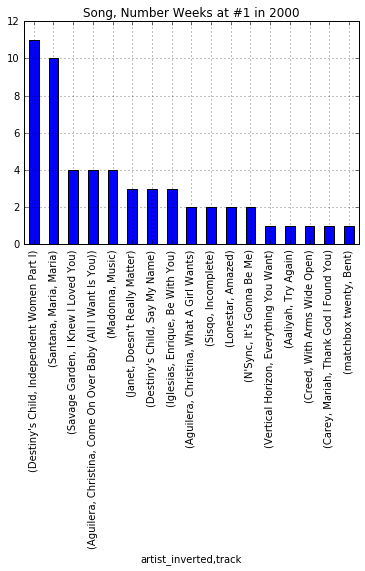

In [92]:
# Number of Weeks a song was ranked #1
dfMoviesMelted[dfMoviesMelted['Ranking'] == 1].groupby(by=['artist_inverted','track']).count().sort_values('Ranking',ascending=False)['Ranking'].plot(sort_columns = True,kind='bar',grid=True,legend=False,title='Song, Number Weeks at #1 in 2000')

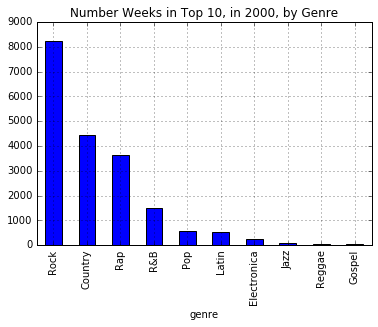

In [93]:
# Number of weeks a genre was in the Top 10
dfMoviesMelted[dfMoviesMelted['Ranking'] <= 10].groupby(by=['genre']).count().sort_values('Ranking', ascending=False)['Ranking'].plot(sort_columns = True,kind='bar',grid=True,legend=False,title='Number Weeks in Top 10, in 2000, by Genre')

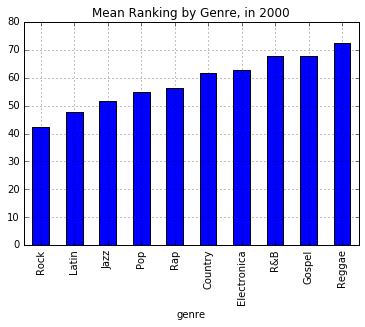

In [103]:
# Average ranking by genre
dfMoviesMelted[dfMoviesMelted['Ranking'] > 0].groupby(by=['genre']).mean().sort_values('Ranking', ascending=True)['Ranking'].plot(sort_columns = True,kind='bar',grid=True,legend=False,title='Mean Ranking by Genre, in 2000')


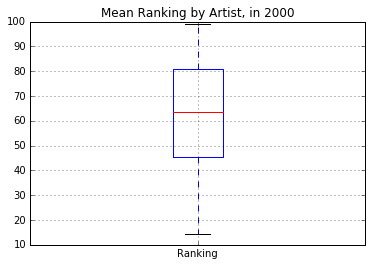

In [120]:
# Boxplot showing artists' mean rankings
dfMoviesMelted[dfMoviesMelted['Ranking'] > 1].groupby(by=['artist_inverted']).mean()['Ranking'].plot(sort_columns = True,kind='box',grid=True,legend=False,title='Mean Ranking by Artist, in 2000')


track
Independent Women Part I    Axes(0.125,0.125;0.775x0.775)
dtype: object

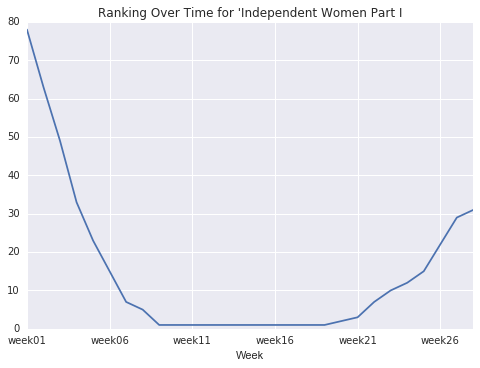

In [139]:
# Chart a track's ranking - Independent Women Part I
dfTemp = dfMoviesMelted[(dfMoviesMelted['track'] == 'Independent Women Part I') & (dfMoviesMelted['Ranking'] > 0)]
dfTemp.groupby(by='track').plot(x='Week',y='Ranking',sort_columns = True,kind='line',grid=True,legend=False,title="Ranking Over Time for 'Independent Women Part I")


track
Maria, Maria    Axes(0.125,0.125;0.775x0.775)
dtype: object

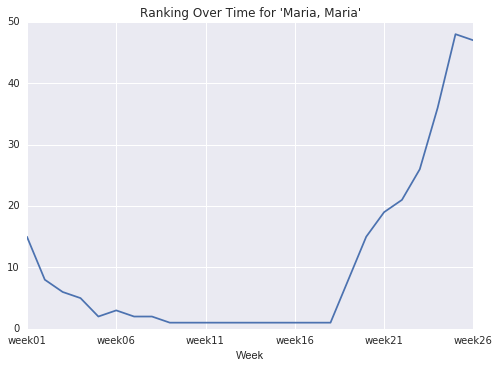

In [142]:
# Chart a track's ranking - Maria, Maria
dfTemp = dfMoviesMelted[(dfMoviesMelted['track'] == 'Maria, Maria') & (dfMoviesMelted['Ranking'] > 0)]
dfTemp.groupby(by='track').plot(x='Week',y='Ranking',sort_columns = True,kind='line',grid=True,legend=False,title="Ranking Over Time for 'Maria, Maria'")


## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 